<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Financial Theory with Python
**&mdash;A Gentle Introduction**

Dr Yves J Hilpisch | The Python Quants | The AI Machine

http://tpq.io | http://aimachine.io | [@dyjh](http://twitter.com/dyjh)

<img src="https://hilpisch.com/finpy_cover.png" width=30% border=1px align=left>

## Chapter 06 &mdash; Dynamic Economy

## Binomial Model

In [1]:
import math
import numpy as np

In [2]:
S0 = 36.
K = 40.
r = 0.06
T = 1.0
sigma = 0.2

In [3]:
m = 4
dt = T / m
df = math.exp(-r * dt)
up = math.exp(sigma * math.sqrt(dt))
down = 1 / up

In [4]:
q = (1 / df - down) / (up - down)

### Binomial Option Pricing based on Python Loops

In [5]:
S = np.zeros((m + 1, m + 1))
S

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
S[0, 0] = S0
S

array([[36.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [7]:
z = 1
for t in range(1, m + 1):
    for i in range(0, z):
        S[i, t] = S[i, t - 1] * up
        S[i + 1 ,t] = S[i, t - 1] * down
    z += 1

In [8]:
np.set_printoptions(formatter=
        {'float_kind': lambda x: '%7.3f' % x})

In [9]:
S

array([[ 36.000,  39.786,  43.970,  48.595,  53.706],
       [  0.000,  32.574,  36.000,  39.786,  43.970],
       [  0.000,   0.000,  29.474,  32.574,  36.000],
       [  0.000,   0.000,   0.000,  26.669,  29.474],
       [  0.000,   0.000,   0.000,   0.000,  24.132]])

In [10]:
h = np.zeros_like(S)

In [11]:
z = 1
for t in range(0, m + 1):
    for i in range(0, z):
        h[i, t] = max(K - S[i, t], 0)
    z += 1

In [12]:
h

array([[  4.000,   0.214,   0.000,   0.000,   0.000],
       [  0.000,   7.426,   4.000,   0.214,   0.000],
       [  0.000,   0.000,  10.526,   7.426,   4.000],
       [  0.000,   0.000,   0.000,  13.331,  10.526],
       [  0.000,   0.000,   0.000,   0.000,  15.868]])

In [13]:
V = np.zeros_like(S)
V[:, -1] = h[:, -1]
V

array([[  0.000,   0.000,   0.000,   0.000,   0.000],
       [  0.000,   0.000,   0.000,   0.000,   0.000],
       [  0.000,   0.000,   0.000,   0.000,   4.000],
       [  0.000,   0.000,   0.000,   0.000,  10.526],
       [  0.000,   0.000,   0.000,   0.000,  15.868]])

In [14]:
m

4

In [15]:
# European option pricing
z = 0
for t in range(m - 1, -1, -1):
    for i in range(0, m - z):
        V[i, t] = df * (q * V[i, t + 1] +
                    (1-q) * V[i + 1, t + 1])
    z += 1

In [16]:
V

array([[  3.977,   2.190,   0.784,   0.000,   0.000],
       [  0.000,   6.299,   3.985,   1.771,   0.000],
       [  0.000,   0.000,   9.344,   6.830,   4.000],
       [  0.000,   0.000,   0.000,  12.735,  10.526],
       [  0.000,   0.000,   0.000,   0.000,  15.868]])

In [17]:
V[0, 0]

3.9771456941187893

In [18]:
# American option pricing
z = 0
for t in range(m - 1, -1, -1):
    for i in range(0, m-z):
        V[i, t] = df * (q * V[i, t + 1] +
                  (1 - q) * V[i + 1, t + 1])
        V[i, t] = max(h[i, t], V[i, t])
    z += 1

In [19]:
V

array([[  4.540,   2.307,   0.784,   0.000,   0.000],
       [  0.000,   7.426,   4.249,   1.771,   0.000],
       [  0.000,   0.000,  10.526,   7.426,   4.000],
       [  0.000,   0.000,   0.000,  13.331,  10.526],
       [  0.000,   0.000,   0.000,   0.000,  15.868]])

In [20]:
V[0, 0]

4.539560595224299

### Vectorized Implementation with NumPy

In [21]:
u = np.arange(m + 1)
u

array([0, 1, 2, 3, 4])

In [22]:
u ** 2

array([ 0,  1,  4,  9, 16])

In [23]:
2 ** u

array([ 1,  2,  4,  8, 16])

In [24]:
u = np.resize(u, (m + 1, m + 1))
u

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [25]:
d = u.T
d

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [26]:
(u - 2 * d)

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [27]:
S = S0 * np.exp(sigma * math.sqrt(dt) * (u - 2 * d))
S

array([[ 36.000,  39.786,  43.970,  48.595,  53.706],
       [ 29.474,  32.574,  36.000,  39.786,  43.970],
       [ 24.132,  26.669,  29.474,  32.574,  36.000],
       [ 19.757,  21.835,  24.132,  26.669,  29.474],
       [ 16.176,  17.877,  19.757,  21.835,  24.132]])

In [28]:
h = np.maximum(K - S, 0)
h

array([[  4.000,   0.214,   0.000,   0.000,   0.000],
       [ 10.526,   7.426,   4.000,   0.214,   0.000],
       [ 15.868,  13.331,  10.526,   7.426,   4.000],
       [ 20.243,  18.165,  15.868,  13.331,  10.526],
       [ 23.824,  22.123,  20.243,  18.165,  15.868]])

In [29]:
V = h.copy()

In [30]:
# European option pricing
for t in range(m - 1, -1, -1):
    V[0:-1, t] = df * (q * V[:-1, t + 1] +
                   (1-q) * V[1:, t + 1])

In [31]:
V[0, 0]

3.977145694118792

In [32]:
# American option pricing
for t in range(m - 1, -1, -1):
    V[0:-1, t] = df * (q * V[:-1, t + 1] +
                   (1-q) * V[1:, t + 1])
    V[:, t] = np.maximum(h[:, t], V[:, t])

In [33]:
V

array([[  4.540,   2.307,   0.784,   0.000,   0.000],
       [ 10.526,   7.426,   4.249,   1.771,   0.000],
       [ 15.868,  13.331,  10.526,   7.426,   4.000],
       [ 20.243,  18.165,  15.868,  13.331,  10.526],
       [ 23.824,  22.123,  20.243,  18.165,  15.868]])

In [34]:
V[0, 0]

4.5395605952243

### Speed Comparison

In [35]:
m = 500
dt = T / m
df = math.exp(-r * dt)
up = math.exp(sigma * math.sqrt(dt))
down = 1 / up
q = (1 / df - down) / (up - down)
q

0.5044724639230862

In [36]:
def binomial_looping():
    # stock price simulation in binomial tree
    S = np.zeros((m + 1, m + 1))
    S[0, 0] = S0
    z = 1
    for t in range(1, m + 1):
        for i in range(0, z):
            S[i, t] = S[i, t - 1] * up
            S[i + 1 ,t] = S[i, t - 1] * down
        z += 1
    # inner value calculation
    h = np.zeros_like(S)
    z = 1
    for t in range(0, m + 1):
        for i in range(0, z):
            h[i, t] = max(K - S[i, t], 0)
        z += 1
    # American option pricing
    V = np.zeros_like(S)
    V[:, -1] = h[:, -1]
    z = 0
    for t in range(m - 1, -1, -1):
        for i in range(0, m - z):
            V[i, t] = df * (q * V[i, t + 1] +
                      (1 - q) * V[i + 1, t + 1])
            V[i, t] = max(h[i, t], V[i, t])
        z += 1
    return V[0, 0]

In [37]:
%time binomial_looping()

CPU times: user 167 ms, sys: 2.54 ms, total: 169 ms
Wall time: 169 ms


4.486374777505983

In [38]:
%timeit binomial_looping()

170 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
def binomial_vectorization():
    u = np.arange(m + 1)
    u = np.resize(u, (m + 1, m + 1))
    d = u.T
    # stock price simulation
    S = S0 * np.exp(sigma * math.sqrt(dt) * (u - 2 * d))
    # inner value calculation
    h = np.maximum(K - S, 0)
    # American option pricing
    V = h.copy()
    for t in range(m-1, -1, -1):
        V[0:-1, t] = df * (q * V[:-1, t + 1] +
                       (1-q) * V[1:, t + 1])
        V[:, t] = np.maximum(h[:, t], V[:, t])
    return V[0, 0]

In [40]:
%time binomial_vectorization()

CPU times: user 5.2 ms, sys: 3.07 ms, total: 8.27 ms
Wall time: 9.83 ms


4.486374777506075

In [41]:
%timeit binomial_vectorization()

4.5 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
171 / 4.31

39.675174013921115

## Monte Carlo Simulation

In the Black-Scholes-Merton (1973) model based on the geometric Brownian motion, the future price $S_t$ of the risky stock is given in a discrete simulation context by

$$S_t = S_{t - \Delta t} \cdot \exp \left(\left(r - \frac{\sigma^2}{2} \right)\Delta t + \sigma \sqrt{\Delta t} z \right)$$

$S_0$ is the initial stock price, $r$ the risk-free short rate, $\sigma$ the volatility factor, $T>0$ a future point in time and $z$ a standard normally distributed rv. $\Delta t$ is the homogeneous time interval.

In [43]:
S0 = 36.
K = 40.
r = 0.06
T = 1.0
sigma = 0.2

### Simulating the Stock Price Process

In [44]:
M = 100
I = 50000

In [45]:
dt = T / M
dt

0.01

In [46]:
df = math.exp(-r * dt)
df

0.9994001799640054

In [47]:
from numpy.random import default_rng
rng = default_rng(100)

In [48]:
rn = rng.standard_normal((M + 1, I))
rn

array([[ -1.158,   0.290,   0.781, ...,   1.885,   0.049,  -0.760],
       [  0.462,  -1.396,   0.138, ...,  -1.349,   0.146,  -0.532],
       [  0.198,  -0.040,  -0.734, ...,   2.137,   0.173,  -0.345],
       ...,
       [ -0.216,  -1.308,   0.728, ...,  -0.825,  -0.602,  -0.401],
       [ -2.134,  -1.238,   0.583, ...,   0.963,   0.886,   0.777],
       [  2.125,  -0.415,   0.711, ...,   1.193,   0.098,  -0.517]])

In [49]:
S = np.zeros_like(rn)
S[0] = S0
S

array([[ 36.000,  36.000,  36.000, ...,  36.000,  36.000,  36.000],
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000],
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000],
       ...,
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000],
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000],
       [  0.000,   0.000,   0.000, ...,   0.000,   0.000,   0.000]])

In [50]:
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - sigma ** 2 / 2) * dt +
                           sigma * math.sqrt(dt) * rn[t])

In [51]:
S

array([[ 36.000,  36.000,  36.000, ...,  36.000,  36.000,  36.000],
       [ 36.349,  35.023,  36.114, ...,  35.056,  36.119,  35.633],
       [ 36.508,  35.009,  35.602, ...,  36.601,  36.259,  35.402],
       ...,
       [ 42.689,  39.760,  40.681, ...,  37.516,  47.893,  42.846],
       [ 40.921,  38.804,  41.175, ...,  38.260,  48.769,  43.534],
       [ 42.716,  38.499,  41.782, ...,  39.200,  48.884,  43.103]])

In [52]:
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_formats = ['svg']

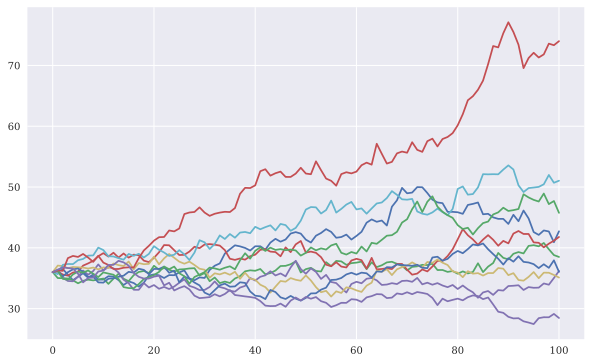

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

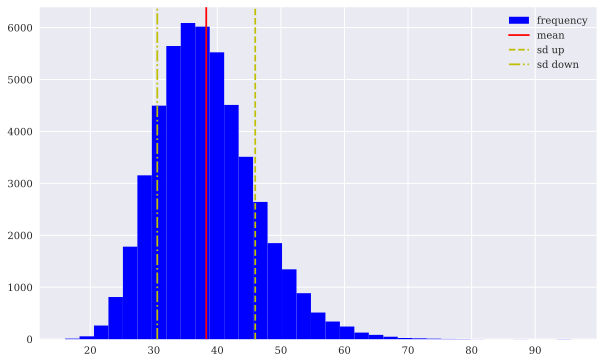

In [54]:
ST = S[-1]
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, color='b', label='frequency');
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), ls='--', color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), ls='-.', color='y', label='sd down')
plt.legend(loc=0);

In [55]:
S0 * math.exp(r * T)

38.22611567563295

In [56]:
ST.mean()

38.25248936738523

### European Option Pricing

In [57]:
h = np.maximum(K - ST, 0)
h

array([  0.000,   1.501,   0.000, ...,   0.800,   0.000,   0.000])

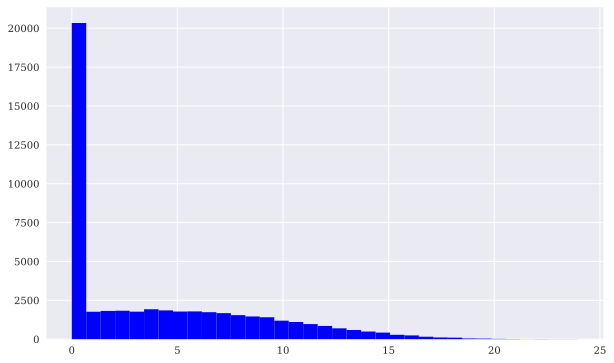

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(h, color='b', bins=35);

In [59]:
math.exp(-r * T) * h.mean()

3.818117261795047

### American Option Pricing

In [60]:
h = np.maximum(K - S, 0)

In [61]:
# Least-Squares Monte Carlo Valuation (LSM algorithm)
V = h[-1]
for t in range(M - 1, 0, -1):
    reg = np.polyfit(S[t], df * V, deg=5)
    C = np.polyval(reg, S[t])
    V = np.where(h[t] > C, h[t], df * V)

In [62]:
df * V.mean()

4.454837750511421

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>